## Guided Project: Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.
Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?
Using scatter plots
How many majors are predominantly male? Predominantly female?
Using histograms
Which category of majors have the most students?
Using bar plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [23]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,"2,339","2,057",282,Engineering,0,36,1976,...,270,1207,37,0,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0,7,640,...,170,388,85,0,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0,3,648,...,133,340,16,0,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,"1,258","1,123",135,Engineering,0,16,758,...,150,692,40,0,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,"32,260","21,239","11,021",Engineering,0,289,25694,...,5180,16697,1672,0,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.iloc[:1]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [8]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [18]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [3]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [4]:
recent_grads = recent_grads.dropna()

In [5]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

In [24]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

### Generate scatter plots in separate jupyter notebook cells to explore the following relations:

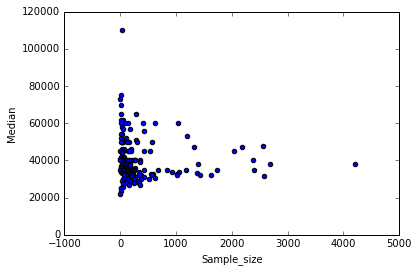

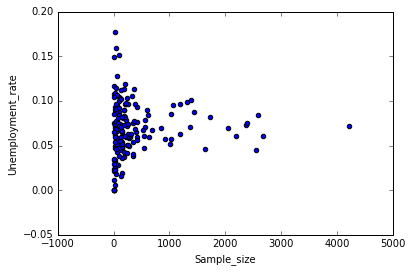

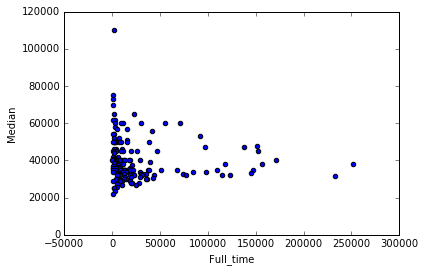

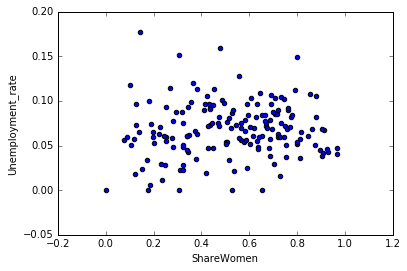

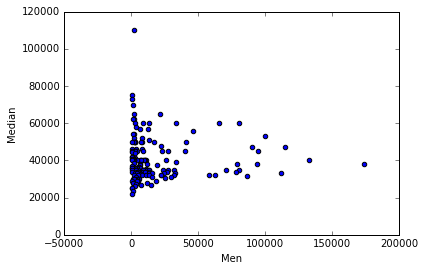

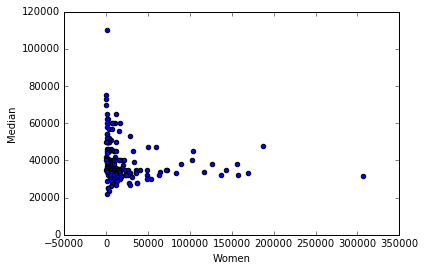

In [7]:
recent_grads.plot(x = "Sample_size", y = "Median", kind = "scatter")
recent_grads.plot(x = "Sample_size", y = "Unemployment_rate", kind = "scatter")
recent_grads.plot(x = "Full_time", y = "Median", kind = "scatter")
recent_grads.plot(x = "ShareWomen", y = "Unemployment_rate", kind = "scatter")
recent_grads.plot(x = "Men", y = "Median", kind = "scatter")
recent_grads.plot(x = "Women", y = "Median", kind = "scatter")

In 'Unemployment_rate' vs. 'ShareWomen' plot, looks like there is no correlation between unemployment rate and the amount of women in the major.

Scatter plot isn't helping much here, lets use other type of plots to understand the data

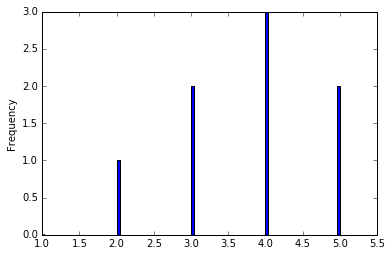

In [10]:
recent_grads["Sample_size"].plot(kind = "hist" , bins = 100, range = (1,5))

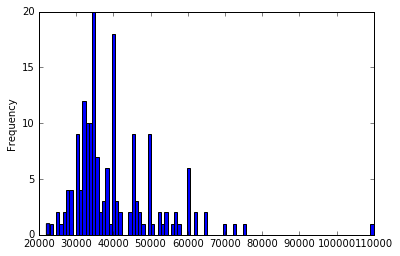

In [11]:
recent_grads["Median"].plot(kind = "hist", bins = 100)

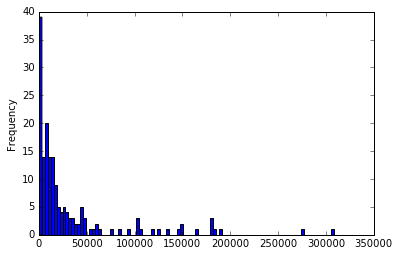

In [12]:
recent_grads["Employed"].plot(kind = "hist", bins = 100)

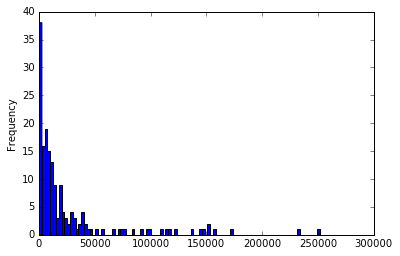

In [13]:
recent_grads["Full_time"].plot(kind = "hist", bins = 100)

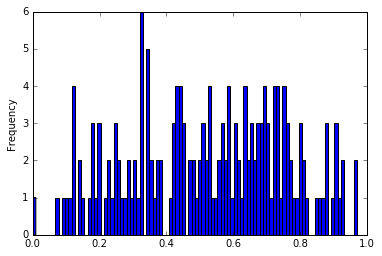

In [14]:
recent_grads["ShareWomen"].plot(kind = "hist", bins = 100)

In [7]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

In [9]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.Total = recent_grads.Total.astype("int64")

In [7]:
recent_grads.Men = recent_grads.Men.astype("int64")

In [8]:
recent_grads.Women = recent_grads.Women.astype("int64")
recent_grads.ShareWomen = recent_grads.ShareWomen.astype("int64")

In [9]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null int64
Men                     172 non-null int64
Women                   172 non-null int64
Major_category          172 non-null object
ShareWomen              172 non-null int64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs           172 non

In [10]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [61]:
recent_grads['Unemployment_rate'].unique().tolist()

[0.018380527,
 0.117241379,
 0.024096386,
 0.050125313,
 0.061097712,
 0.177226407,
 0.095652174,
 0.021167415,
 0.057342277999999997,
 0.059173845,
 0.065409275,
 0.065162085,
 0.09208386,
 0.023042836,
 0.006334343,
 0.087143069,
 0.042875544,
 0.059824231,
 0.061930782999999996,
 0.011689692,
 0.063172771,
 0.087557114,
 0.027788805,
 0.058239614,
 0.07060957400000001,
 0.060023041,
 0.047858702999999995,
 0.074392523,
 0.128426299,
 0.093588575,
 0.055030385,
 0.089375,
 0.075038285,
 0.04486272400000001,
 0.060686356,
 0.099092317,
 0.096448381,
 0.028308097,
 0.07154047,
 0.069749014,
 0.047277137999999996,
 0.093460326,
 0.048224496,
 0.03698279,
 0.060741445,
 0.086273666,
 0.09082330699999999,
 0.085531575,
 0.056994819,
 0.03365166,
 0.042506527,
 0.0,
 0.11398259,
 0.075236167,
 0.10757946199999999,
 0.09679894300000001,
 0.072861468,
 0.113331949,
 0.096175064,
 0.055520827,
 0.084361164,
 0.071982974,
 0.050030835999999995,
 0.019642463,
 0.05253852,
 0.056357078,
 0.03411

In [105]:
recent_grads['Major']

0                              PETROLEUM ENGINEERING
1                     MINING AND MINERAL ENGINEERING
2                          METALLURGICAL ENGINEERING
3          NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                               CHEMICAL ENGINEERING
5                                NUCLEAR ENGINEERING
6                                  ACTUARIAL SCIENCE
7                         ASTRONOMY AND ASTROPHYSICS
8                             MECHANICAL ENGINEERING
9                             ELECTRICAL ENGINEERING
10                              COMPUTER ENGINEERING
11                             AEROSPACE ENGINEERING
12                            BIOMEDICAL ENGINEERING
13                                 MATERIALS SCIENCE
14         ENGINEERING MECHANICS PHYSICS AND SCIENCE
15                            BIOLOGICAL ENGINEERING
16          INDUSTRIAL AND MANUFACTURING ENGINEERING
17                               GENERAL ENGINEERING
18                         ARCHITECTURAL ENGIN

## 1) How many majors are predominantly male? Predominantly female?

## 2) Which category of majors have the most students?


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



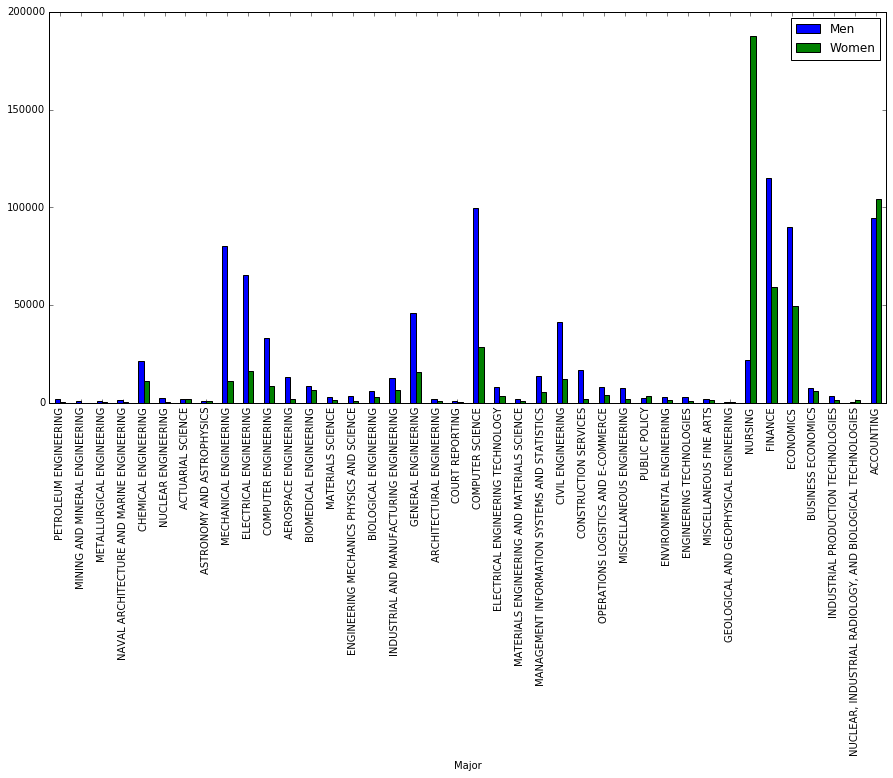

In [97]:
recent_grads[:40].plot.bar(x='Major', y=['Men','Women'], figsize =(15,7))

For first 40 majors

1) Male predominant  in MECHANICAL ENGINEERING, Electrical Engineering,General Engineering, civil engineering, Finance, Economics
2) Female predominant in Nursing and Accounting
3) Majors popular amongst students are  - MEchanical Engineering, Electrical Engineering, General Engineering, Computer Science,Nursing,Finance, Economics and Accounting

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



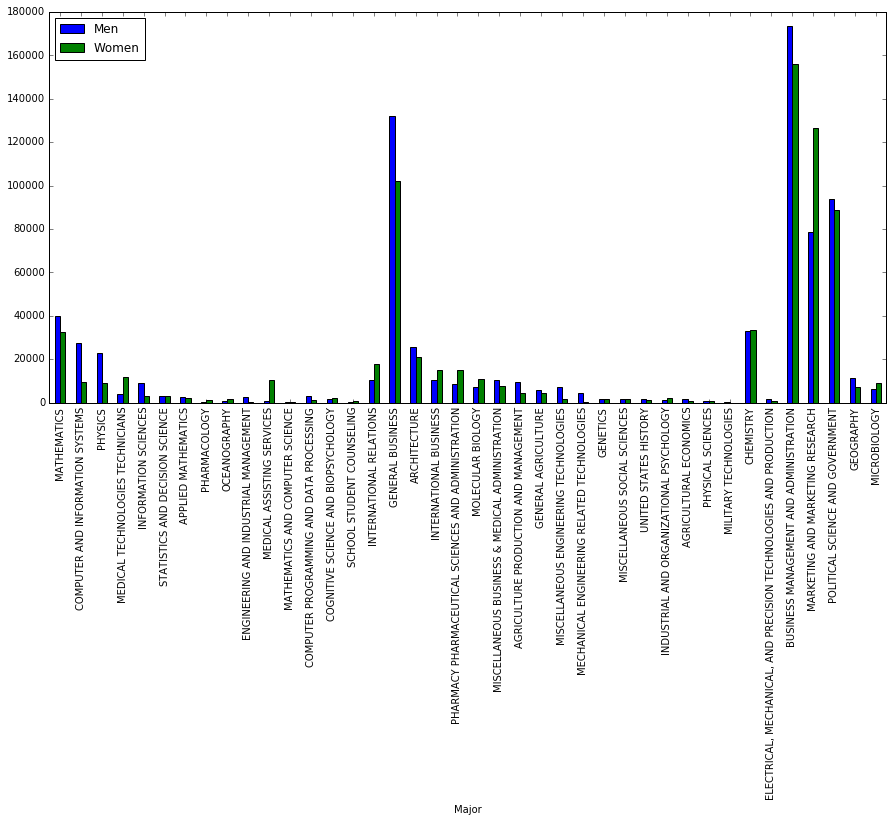

In [98]:
recent_grads[40:80].plot.bar(x='Major', y=['Men','Women'], figsize =(15,7))

For next 40 majors

1) Male predominant  in General Business
2) Female predominant in MArketing and Marketing Research
3) Majors popular amongst students are  - General Business,  Business Management and Administration, MArketing and Marketing Research, Political Science and Government

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



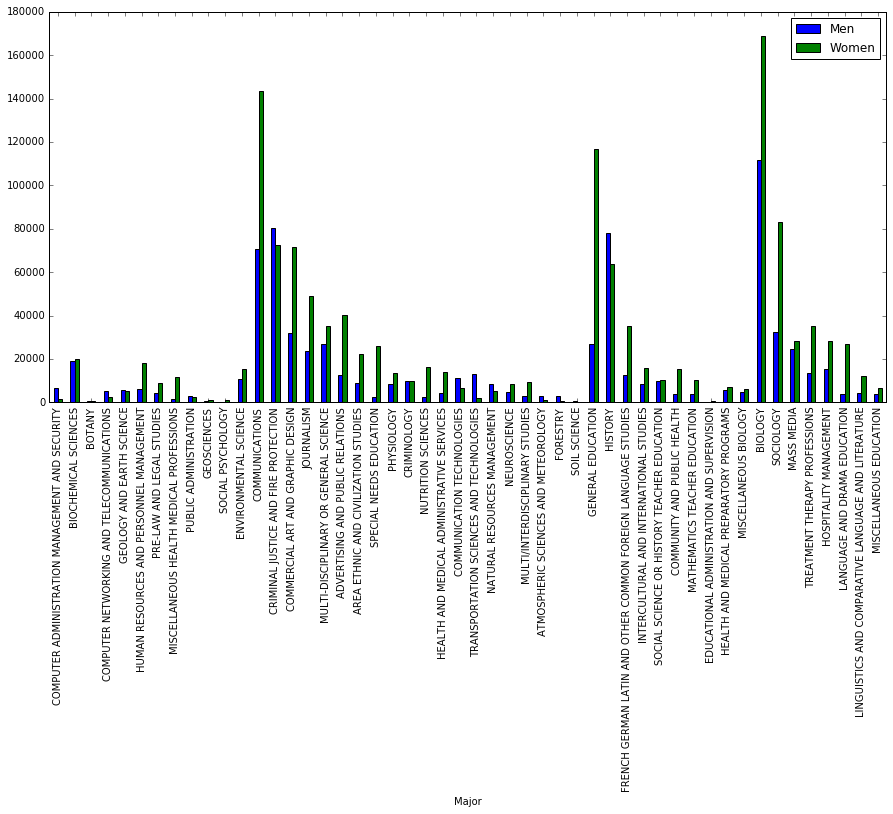

In [103]:
recent_grads[80:130].plot.bar(x='Major', y=['Men','Women'], figsize =(15,7))

For next 50 majors

1) Male predominant  in History 
2) Female predominant in Communications,Commercial Art and Graphic Design, Journalism, Advertising and Public Relations, Area ethnic and civilization studies,General Education, Biology, Socialogy,Language and Drama education
3) Majors popular amongst students are Communications, Criminal justice and practice,General Education, History, Biology, Sociology

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



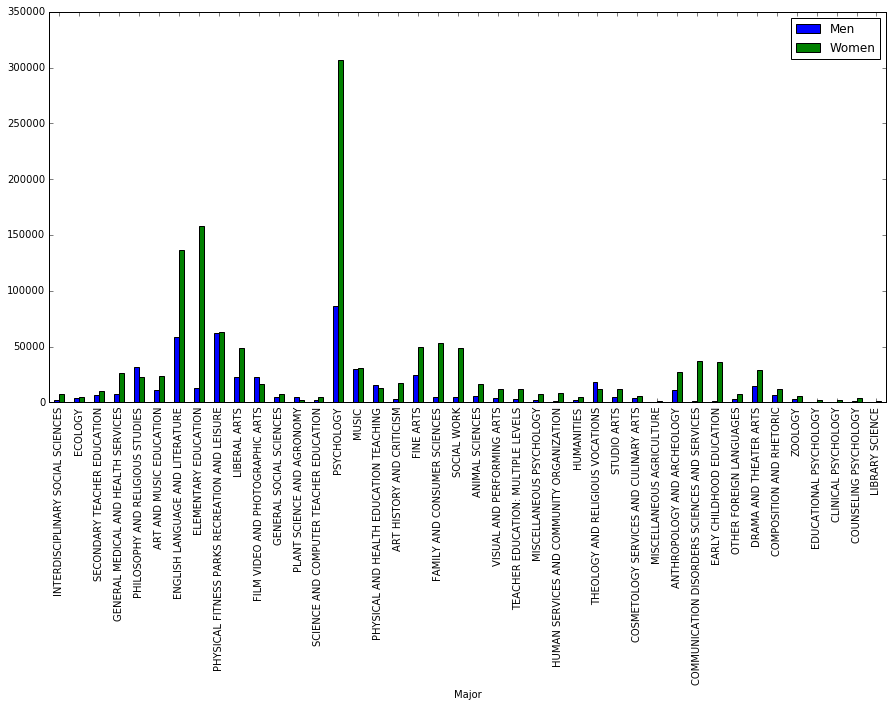

In [102]:
recent_grads[130:180].plot.bar(x = 'Major', y = ['Men' , 'Women'], figsize =(15,7))



For next 50 majors

1) Male predominant  in nothing here 
2) Female predominant in English LAnguage and Literature,Elementry Education, Psychological, Fine Arts, Family and Consumer Sciences, Social Work, Communication Disorder sciences and services, Early Childhood Education
3) Popular Majors -> English LAnguage and Literature,Elementry Education,Psychology

## Do students in more popular majors make more money?

In [106]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0,36,1976,...,270,1207,37,0,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0,7,640,...,170,388,85,0,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0,3,648,...,133,340,16,0,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0,16,758,...,150,692,40,0,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0,289,25694,...,5180,16697,1672,0,65000,50000,75000,18314,4440,972


Popular Majors -> English LAnguage and Literature,Elementry Education,Psychology, Communications, Criminal justice and practice,General Education, History, Biology, Sociology, General Business, Business Management and Administration, MArketing and Marketing Research, Political Science and Government, MEchanical Engineering, Electrical Engineering, General Engineering, Computer Science,Nursing,Finance, Economics and Accounting

Unpopular Majors -> Ecology, Liberal Science, Humanities, Studio Art, Zoology, Library Science, Clinical psychology,Counseling psychology, forestory, soil science, genetics, united states history, physical science, military technologies, pharmocology.oceanography


Lets pick 20 polular Majors and 20 unpopular Majors to check their wages for comparision

In [16]:
recent_grads[['Major','Median' ]]

,Major,Median
0,PETROLEUM ENGINEERING,110000
1,MINING AND MINERAL ENGINEERING,75000
2,METALLURGICAL ENGINEERING,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
4,CHEMICAL ENGINEERING,65000
5,NUCLEAR ENGINEERING,65000
6,ACTUARIAL SCIENCE,62000
7,ASTRONOMY AND ASTROPHYSICS,62000
8,MECHANICAL ENGINEERING,60000
9,ELECTRICAL ENGINEERING,60000


In [17]:
recent_grads['Median'].max()

110000

In [18]:
recent_grads['Median'].min()

22000

In [19]:
recent_grads['Median']< 40000

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
143     True
144     True
145     True
146     True
147     True
148     True
149     True
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157     True
158     True
159     True
160     True
161     True
162     True
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
Name: Median, Length: 172, dtype: bool

In [11]:
low_wage = recent_grads[recent_grads['Median']< 40000]

In [22]:
low_wage.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
74,75,5003,CHEMISTRY,66530,32923,33607,Physical Sciences,0,353,48535,...,15066,29910,2769,0.053972,39000,30000,49900,30382,14718,4288
75,76,5701,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",2435,1869,566,Industrial Arts & Consumer Services,0,37,2107,...,287,1752,64,0.029480,38400,22500,45000,221,1659,81
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927,173809,156118,Business,0,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
77,78,6206,MARKETING AND MARKETING RESEARCH,205211,78857,126354,Business,0,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
78,79,5506,POLITICAL SCIENCE AND GOVERNMENT,182621,93880,88741,Social Science,0,1387,133454,...,43711,83236,15022,0.101175,38000,28000,50000,36854,66947,19803


In [12]:
high_wage = recent_grads[recent_grads['Median']> 60000]

In [29]:
high_wage.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [30]:
high_wage['Major']

0                        PETROLEUM ENGINEERING
1               MINING AND MINERAL ENGINEERING
2                    METALLURGICAL ENGINEERING
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                         CHEMICAL ENGINEERING
5                          NUCLEAR ENGINEERING
6                            ACTUARIAL SCIENCE
7                   ASTRONOMY AND ASTROPHYSICS
Name: Major, dtype: object

In [31]:
low_wage['Major']

74                                             CHEMISTRY
75     ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...
76                BUSINESS MANAGEMENT AND ADMINISTRATION
77                      MARKETING AND MARKETING RESEARCH
78                      POLITICAL SCIENCE AND GOVERNMENT
79                                             GEOGRAPHY
80                                          MICROBIOLOGY
81       COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY
82                                  BIOCHEMICAL SCIENCES
83                                                BOTANY
84            COMPUTER NETWORKING AND TELECOMMUNICATIONS
85                             GEOLOGY AND EARTH SCIENCE
86              HUMAN RESOURCES AND PERSONNEL MANAGEMENT
87                             PRE-LAW AND LEGAL STUDIES
88              MISCELLANEOUS HEALTH MEDICAL PROFESSIONS
89                                 PUBLIC ADMINISTRATION
90                                           GEOSCIENCES
91                             

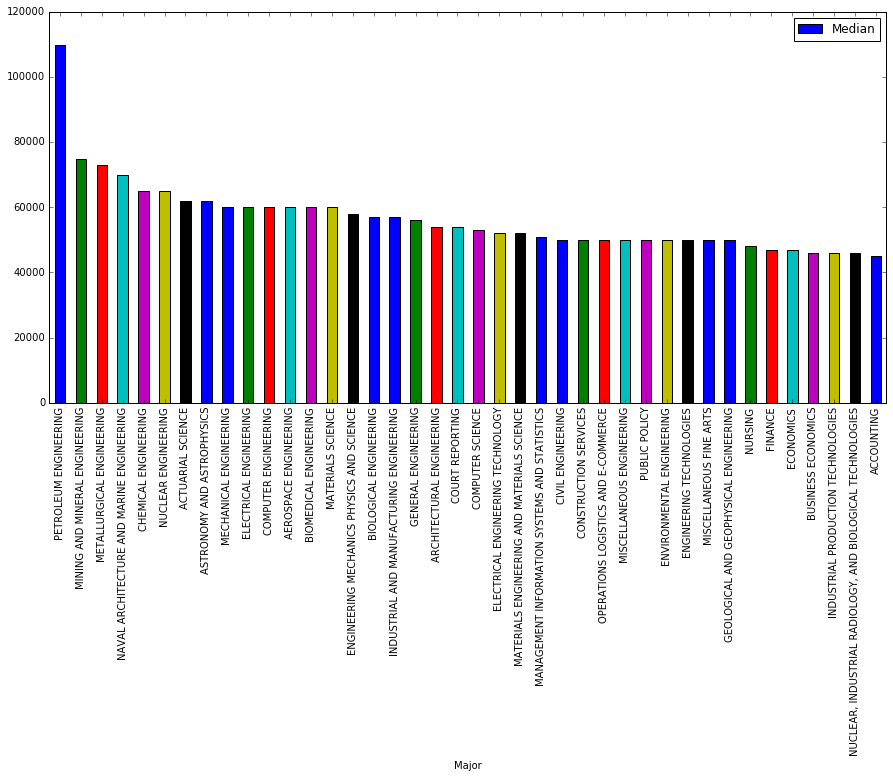

In [16]:
recent_grads[:40].plot.bar(x = 'Major', y = 'Median', figsize =(15,7))

The highest wage had gone for Petroleum Engineering which is above $100000 and is male predominant, doesn't seems to be popular as we see less enrolememt through previous bar plot.
High wages is also for Mining and Mineral Engineering, metallurgical engineering,chemical engineering, mechanical engineering which is around $60000 and seems to be more male predominant and not very popular majors aswell

So definetly wages here is nothing to do with popular majors.


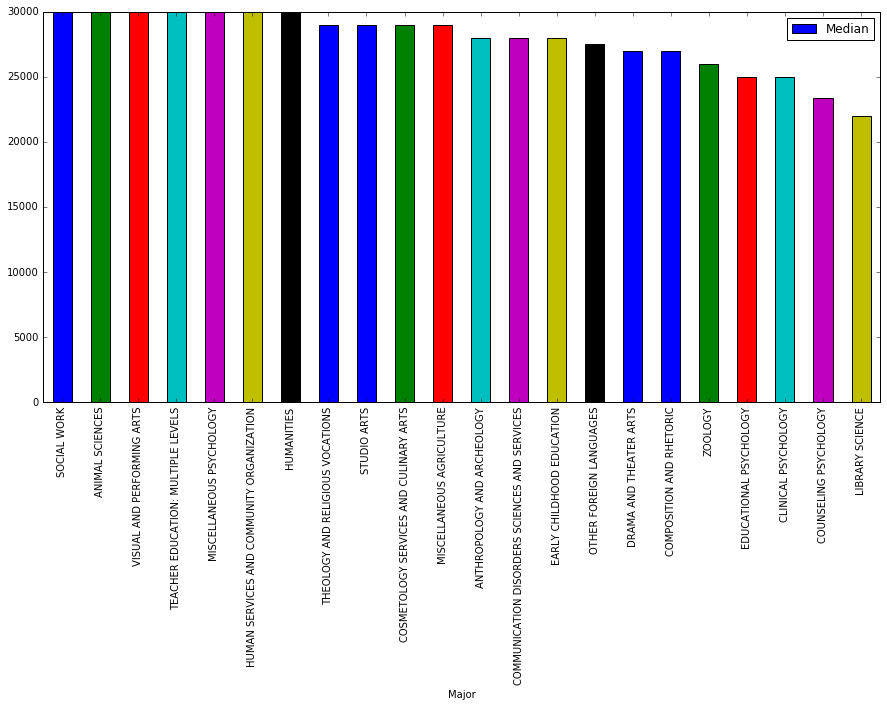

In [17]:
recent_grads[150:].plot.bar(x = 'Major', y = 'Median', figsize =(15,7))

In this plot, we could these are mostly female predominant majors and wages are low , that has gone max to $30000.

Again we can conclude here popularity of majors has nothing to do with wages here.

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe01d20fb00>,
      dtype=object)

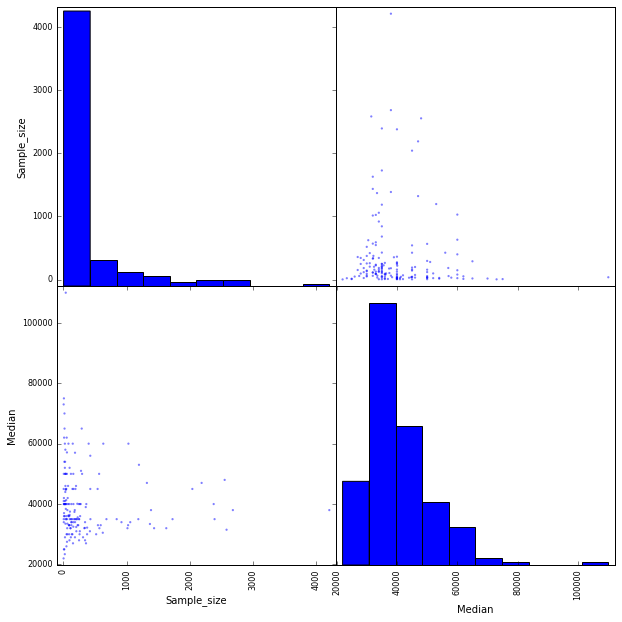

In [20]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))